# Модели регрессии

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [5]:

type(california)


sklearn.utils._bunch.Bunch

In [6]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [8]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [9]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [12]:
y = data['Price']
X = data.drop('Price', axis=1)

In [13]:
y.shape, X.shape

((20640,), (20640, 8))

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [16]:
for k, v in zip(X.columns, model.coef_):
    print(k, v)

MedInc 0.4366932931343243
HouseAge 0.00943577803323796
AveRooms -0.10732204139090437
AveBedrms 0.6450656935198128
Population -3.976389421215296e-06
AveOccup -0.0037865426549709086
Latitude -0.42131437752714346
Longitude -0.4345137546747771


In [17]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718439


In [18]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [19]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


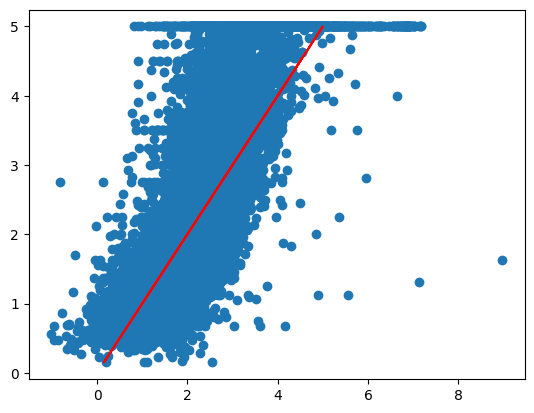

In [20]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [21]:
model.score(X, y)

0.606232685199805

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [23]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

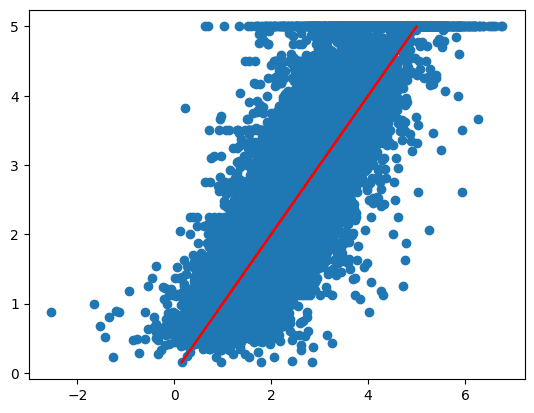

In [24]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [25]:
polynomial.score(poly, y)

0.726207335098328

# Задания для самостоятельного выполнения

### 1. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

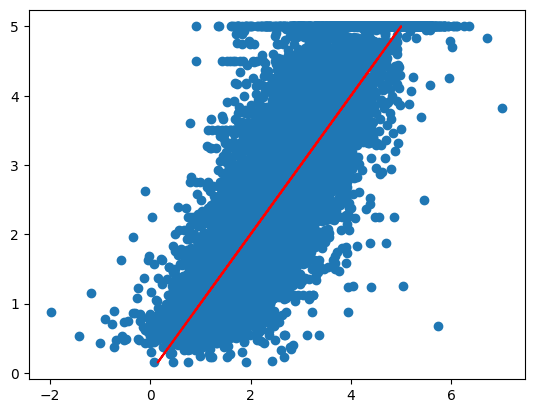

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4).fit_transform(X)

polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [27]:
polynomial.score(poly, y)

0.7450192625818972

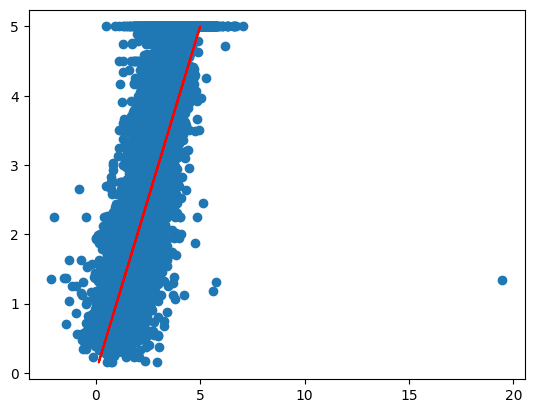

In [28]:
poly = PolynomialFeatures(6).fit_transform(X)

polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [29]:
polynomial.score(poly, y)

0.6720007847754994

При уменьшении степени полинома коэффициент детерминации увеличился, а при увеличении степени уменьшился

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"MSE: {mean_squared_error(y_pred_poly, y)}")
print(f"MAE: {mean_absolute_error(y_pred_poly, y)}")

MSE: 0.4367474534587811
MAE: 0.475046282826309


Для модели можно вывести другие метрики, такие как MSE и MAE

# 2. Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

#### I) Метод опорных векторов

a) Без ядра

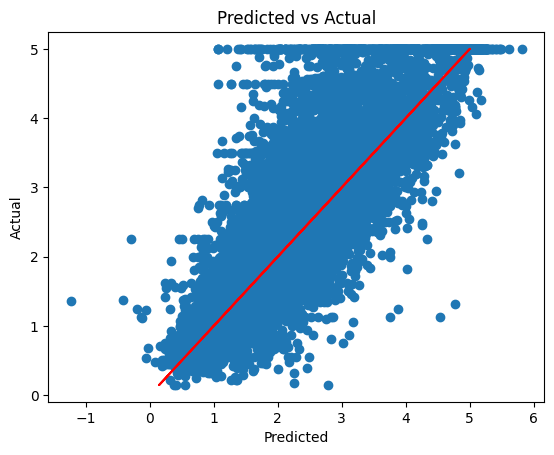

In [31]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_SVR = make_pipeline(StandardScaler(), SVR())
model_SVR.fit(X, y)

y_pred_SVR = model_SVR.predict(X)

plt.scatter(y_pred_SVR, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [32]:
print(f"R^2: {model_SVR.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_SVR, y)}")
print(f"MAE: {mean_absolute_error(y_pred_SVR, y)}")

R^2: 0.7502397399037273
MSE: 0.33256834927970225
MAE: 0.38163177724948305


b) C гауссовым ядром

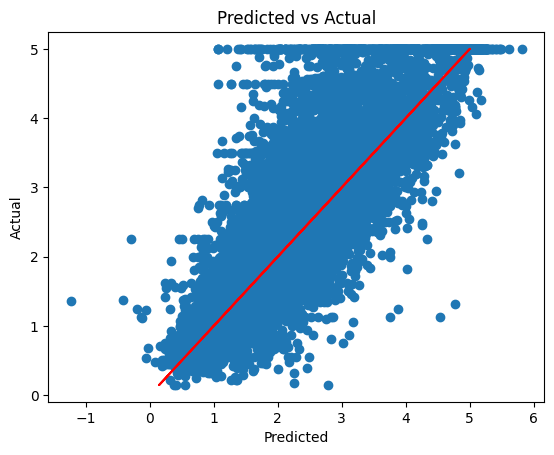

In [33]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_SVR_gauss = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
model_SVR_gauss.fit(X, y)

y_pred_SVR_gauss = model_SVR_gauss.predict(X)

plt.scatter(y_pred_SVR_gauss, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [34]:
print(f"R^2: {model_SVR_gauss.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_SVR_gauss, y)}")
print(f"MAE: {mean_absolute_error(y_pred_SVR_gauss, y)}")

R^2: 0.7502397399037273
MSE: 0.33256834927970225
MAE: 0.38163177724948305


c) С полиномиальным ядром

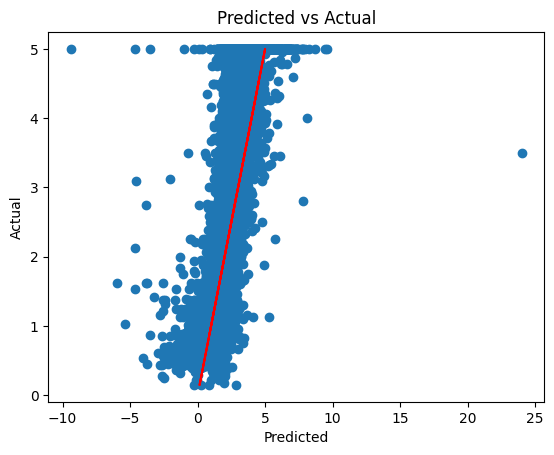

In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', degree=3))
model_SVR_poly.fit(X, y)

y_pred_SVR_poly = model_SVR_poly.predict(X)

plt.scatter(y_pred_SVR_poly, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [36]:
print(f"R^2: {model_SVR_poly.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_SVR_poly, y)}")
print(f"MAE: {mean_absolute_error(y_pred_SVR_poly, y)}")

R^2: 0.47285785429392657
MSE: 0.70191628230069
MAE: 0.5720153565943573


#### II) Метод ближайших соседей

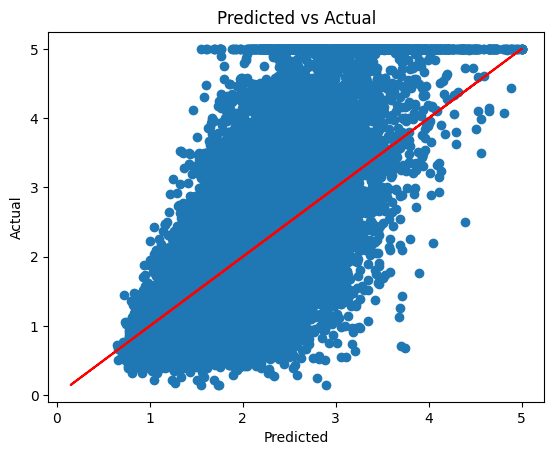

In [37]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X, y)

y_pred_knn = model_knn.predict(X)

plt.scatter(y_pred_knn, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [38]:
print(f"R^2: {model_knn.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_knn, y)}")
print(f"MAE: {mean_absolute_error(y_pred_knn, y)}")

R^2: 0.4711185944964351
MSE: 0.7042321942059601
MAE: 0.6422688544573644


#### III) Многослойный перцептрон

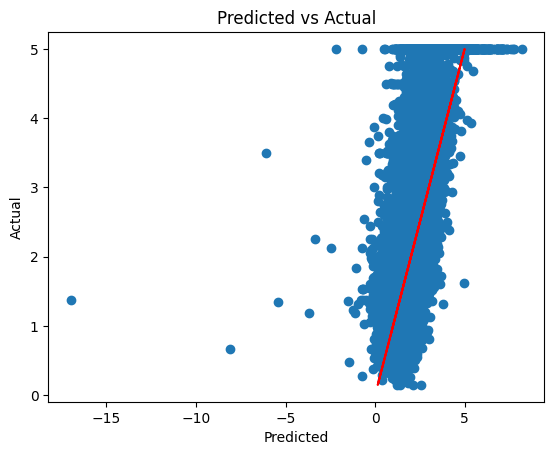

In [39]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(hidden_layer_sizes=(100, 50),  # 2 скрытых слоя: 100 и 50 нейронов
                         activation='relu',             # функция активации
                         solver='adam',                 # оптимизатор
                         max_iter=1000,                 # число эпох
                         random_state=42)

model_mlp.fit(X, y)
y_pred_mlp = model_mlp.predict(X)

plt.scatter(y_pred_mlp, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [40]:
print(f"R^2: {model_mlp.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_mlp, y)}")
print(f"MAE: {mean_absolute_error(y_pred_mlp, y)}")

R^2: 0.44309092553322993
MSE: 0.7415524452245095
MAE: 0.6276656396231001


#### IV) Дерево решений

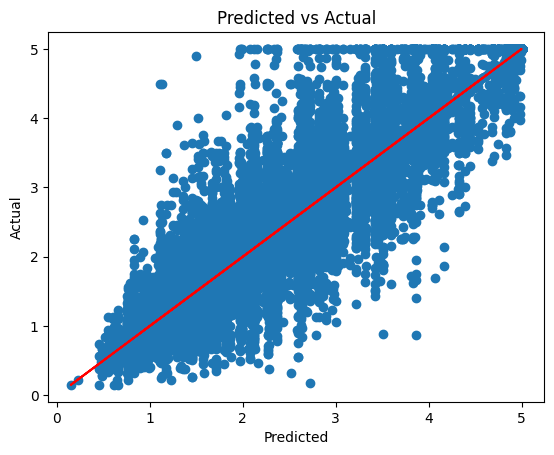

In [41]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=10, random_state=42)
model_tree.fit(X, y)  
y_pred_tree = model_tree.predict(X)  

plt.scatter(y_pred_tree, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [42]:
print(f"R^2: {model_tree.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_tree, y)}")
print(f"MAE: {mean_absolute_error(y_pred_tree, y)}")

R^2: 0.8206970165223322
MSE: 0.23875094145525202
MAE: 0.3342488490418862


#### V) (*) Другие методы

a) Гребневая регрессия

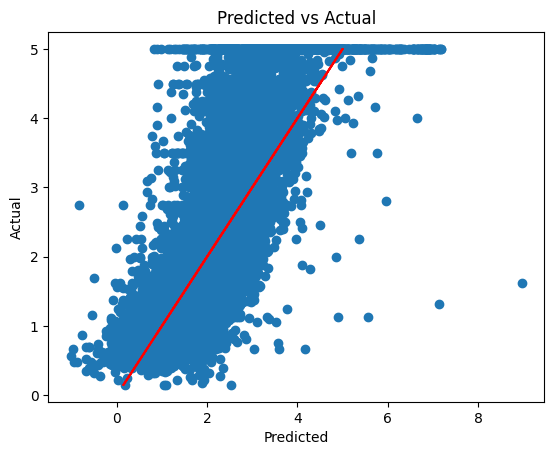

In [43]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1)
model_ridge.fit(X, y)  
y_pred_ridge = model_ridge.predict(X)  

plt.scatter(y_pred_ridge, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [44]:
print(f"R^2: {model_ridge.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_ridge, y)}")
print(f"MAE: {mean_absolute_error(y_pred_ridge, y)}")

R^2: 0.6062326586911464
MSE: 0.5243210214822195
MAE: 0.5311725320253049


b) Lasso регрессия

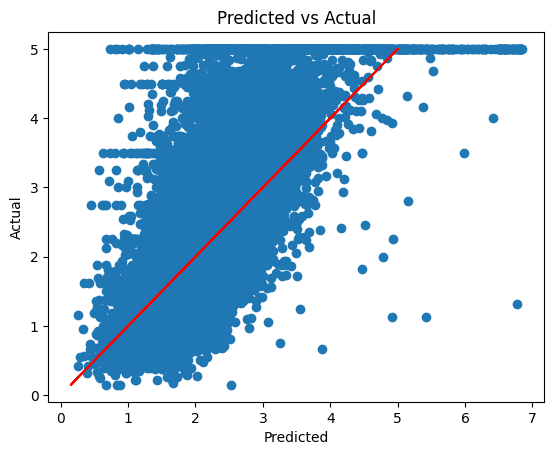

In [45]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X, y)  
y_pred_lasso = model_lasso.predict(X)  

plt.scatter(y_pred_lasso, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [46]:
print(f"R^2: {model_lasso.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_lasso, y)}")
print(f"MAE: {mean_absolute_error(y_pred_lasso, y)}")

R^2: 0.5452665703368436
MSE: 0.6055004347252055
MAE: 0.5800438170792337


c) ElasticNet Регрессия

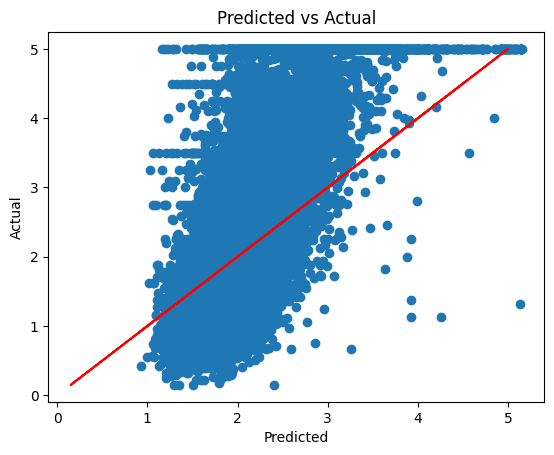

In [47]:
from sklearn.linear_model import ElasticNet

model_elasticnet= ElasticNet()
model_elasticnet.fit(X, y)  
y_pred_elasticnet = model_elasticnet.predict(X)  

plt.scatter(y_pred_elasticnet, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [48]:
print(f"R^2: {model_elasticnet.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_elasticnet, y)}")
print(f"MAE: {mean_absolute_error(y_pred_elasticnet, y)}")

R^2: 0.4230627291195209
MSE: 0.7682209961692811
MAE: 0.6793139475863789


d) Случайный лес

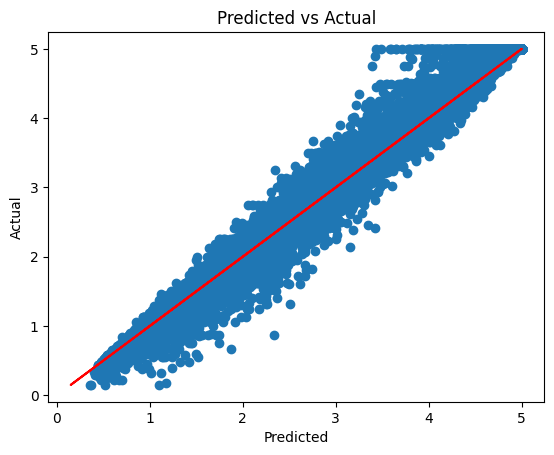

In [49]:
from sklearn.ensemble import RandomForestRegressor

model_randomforest = RandomForestRegressor(n_estimators=100, random_state=0)
model_randomforest.fit(X, y)  
y_pred_randomforest = model_randomforest.predict(X)  

plt.scatter(y_pred_randomforest, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [50]:
print(f"R^2: {model_randomforest.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_randomforest, y)}")
print(f"MAE: {mean_absolute_error(y_pred_randomforest, y)}")

R^2: 0.9738997639919894
MSE: 0.03475377708867255
MAE: 0.11977425859011667


e) Беггинг

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


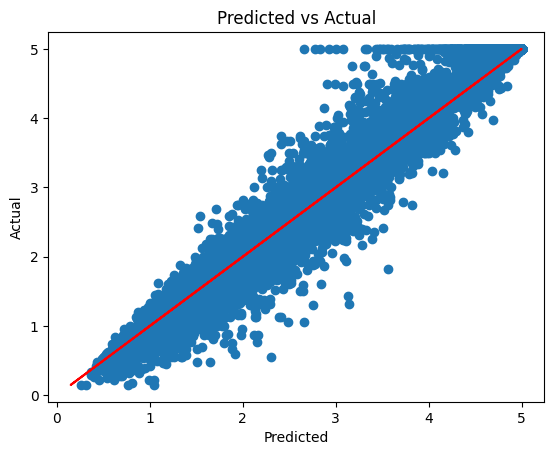

In [51]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_model = DecisionTreeRegressor()
model_bagging = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=0)
model_bagging.fit(X, y)
y_pred_bagging = model_bagging.predict(X)

plt.scatter(y_pred_bagging, y)
plt.plot(y, y, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [52]:
print(f"R^2: {model_bagging.score(X, y)}")
print(f"MSE: {mean_squared_error(y_pred_bagging, y)}")
print(f"MAE: {mean_absolute_error(y_pred_bagging, y)}")

R^2: 0.9619058710696528
MSE: 0.05072424880855895
MAE: 0.13883414937015506


### 3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [68]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


def fit_all_models(X_train, y_train):
    model_arr = [make_pipeline(StandardScaler(), SVR()), 
                make_pipeline(StandardScaler(), SVR(kernel="rbf")), 
                make_pipeline(StandardScaler(), SVR(kernel="poly", degree=3)),
                KNeighborsRegressor(n_neighbors=3),
                MLPRegressor(hidden_layer_sizes=(100, 50),  
                            activation='relu',             
                            solver='adam',                 
                            max_iter=1000,                 
                            random_state=42),
                DecisionTreeRegressor(max_depth=10, random_state=42),
                Ridge(alpha=1),
                Lasso(alpha=0.1),
                ElasticNet(),
                RandomForestRegressor(n_estimators=100, random_state=0),
                BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0)]


    fig, axs = plt.subplots(3, 4, figsize=(20, 12))
    axs = axs.flatten()

    metrics = []

    for i, (model, name) in enumerate(zip(model_arr, [
        "SVR", "SVR (rbf)", "SVR (poly)", "KNN", "MLP", "Decision Tree", 
        "Ridge", "Lasso", "ElasticNet", "Random Forest", "Bagging"
    ])):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)

        r2 = model.score(X_train, y_train)
        mae = mean_absolute_error(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)

        metrics.append({
            "Model": name,
            "R2": r2,
            "MAE": mae,
            "MSE": mse
        })

        axs[i].scatter(y_pred, y_train, alpha=0.6)
        axs[i].plot(y_train, y_train, color='red')
        axs[i].set_title(name)
        axs[i].set_xlabel("Predicted")
        axs[i].set_ylabel("Actual")

    for j in range(len(model_arr), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    metrics_df = pd.DataFrame(metrics)
    print(metrics_df)
        

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


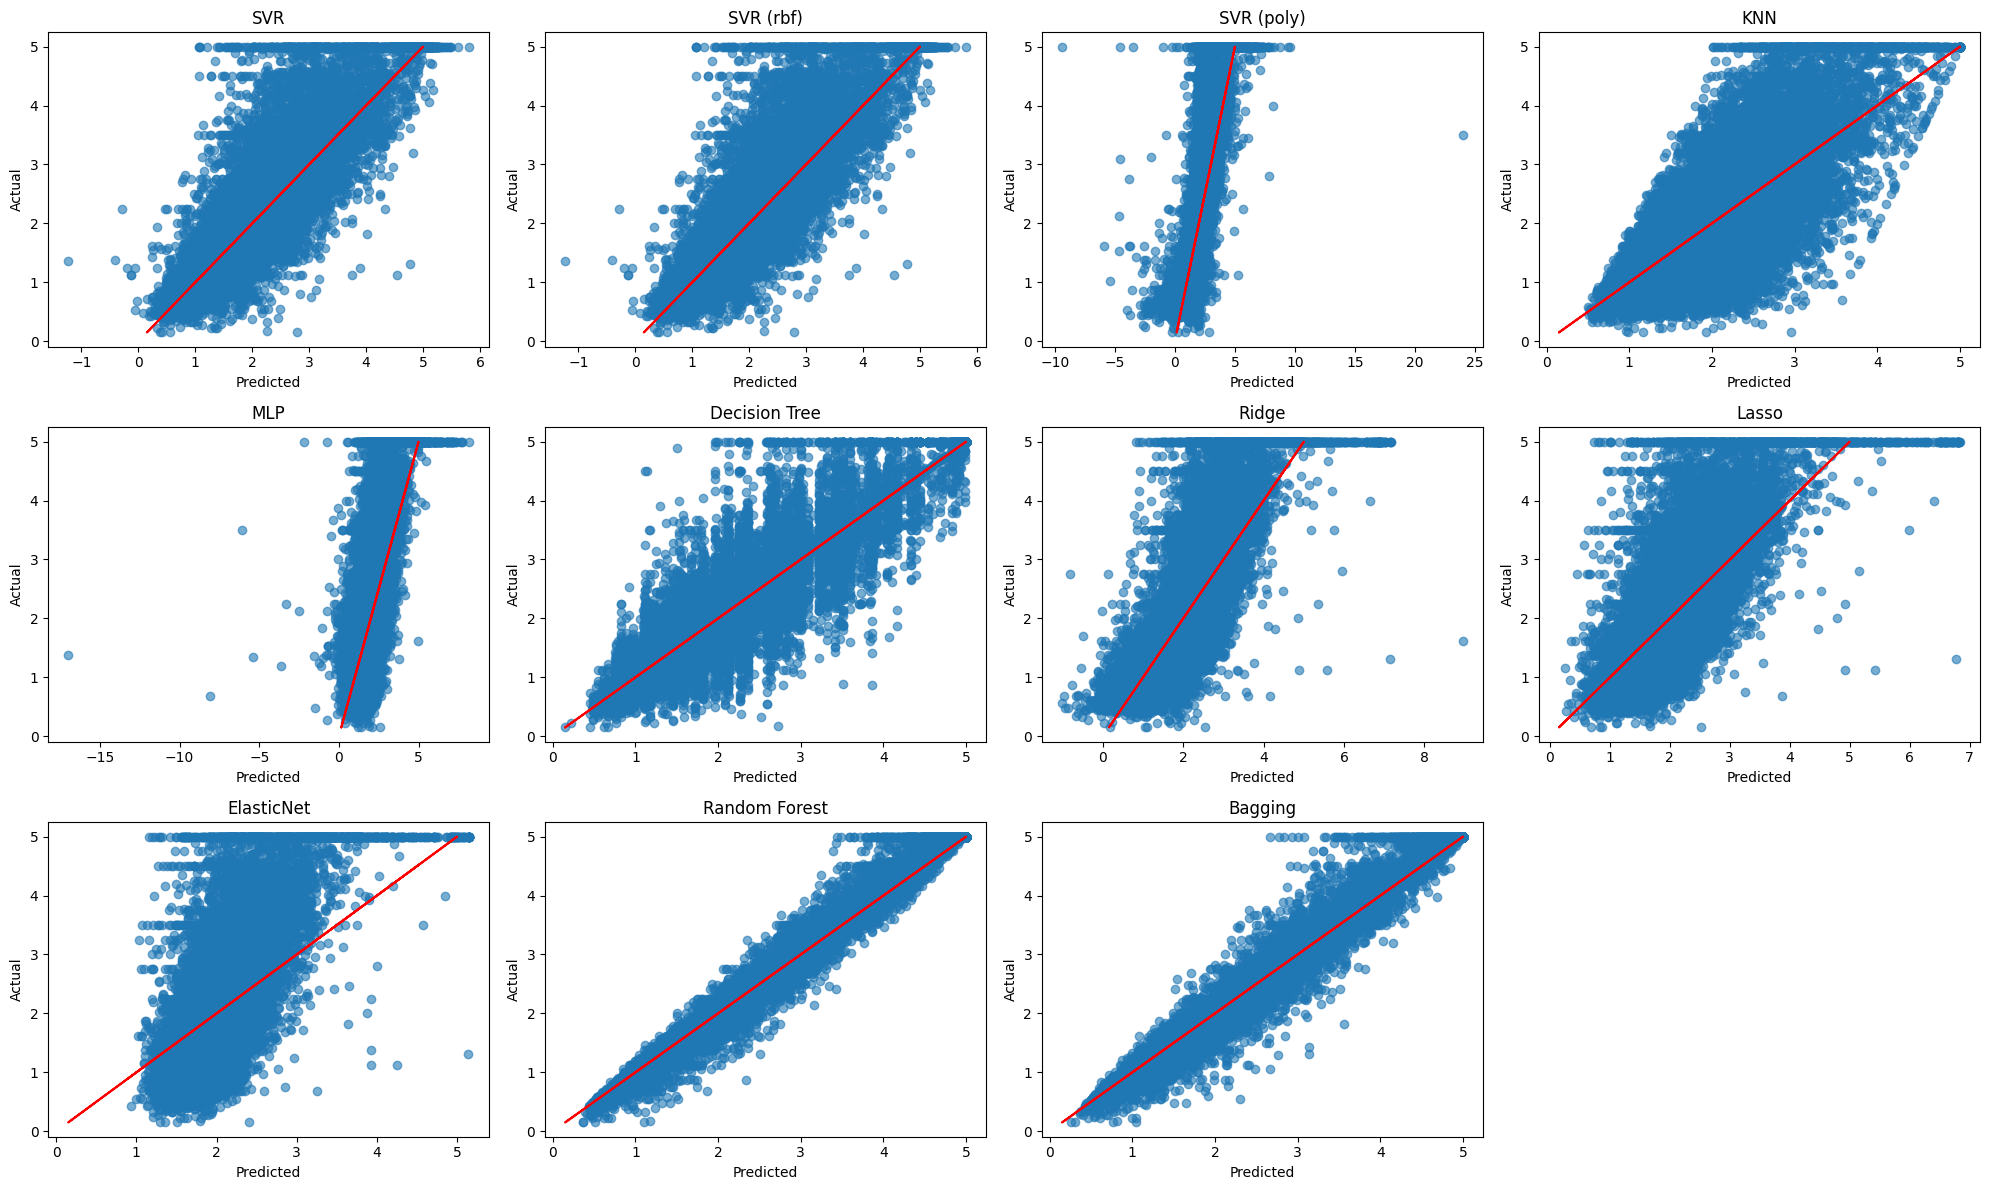

            Model        R2       MAE       MSE
0             SVR  0.750240  0.381632  0.332568
1       SVR (rbf)  0.750240  0.381632  0.332568
2      SVR (poly)  0.472858  0.572015  0.701916
3             KNN  0.595413  0.556361  0.538728
4             MLP  0.443091  0.627666  0.741552
5   Decision Tree  0.820697  0.334249  0.238751
6           Ridge  0.606233  0.531173  0.524321
7           Lasso  0.545267  0.580044  0.605500
8      ElasticNet  0.423063  0.679314  0.768221
9   Random Forest  0.973900  0.119774  0.034754
10        Bagging  0.961906  0.138834  0.050724


In [69]:
fit_all_models(X, y)

### 4. Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [73]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [65]:
y_diabets = df['target']
X_diabets = df.drop("target", axis=1)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


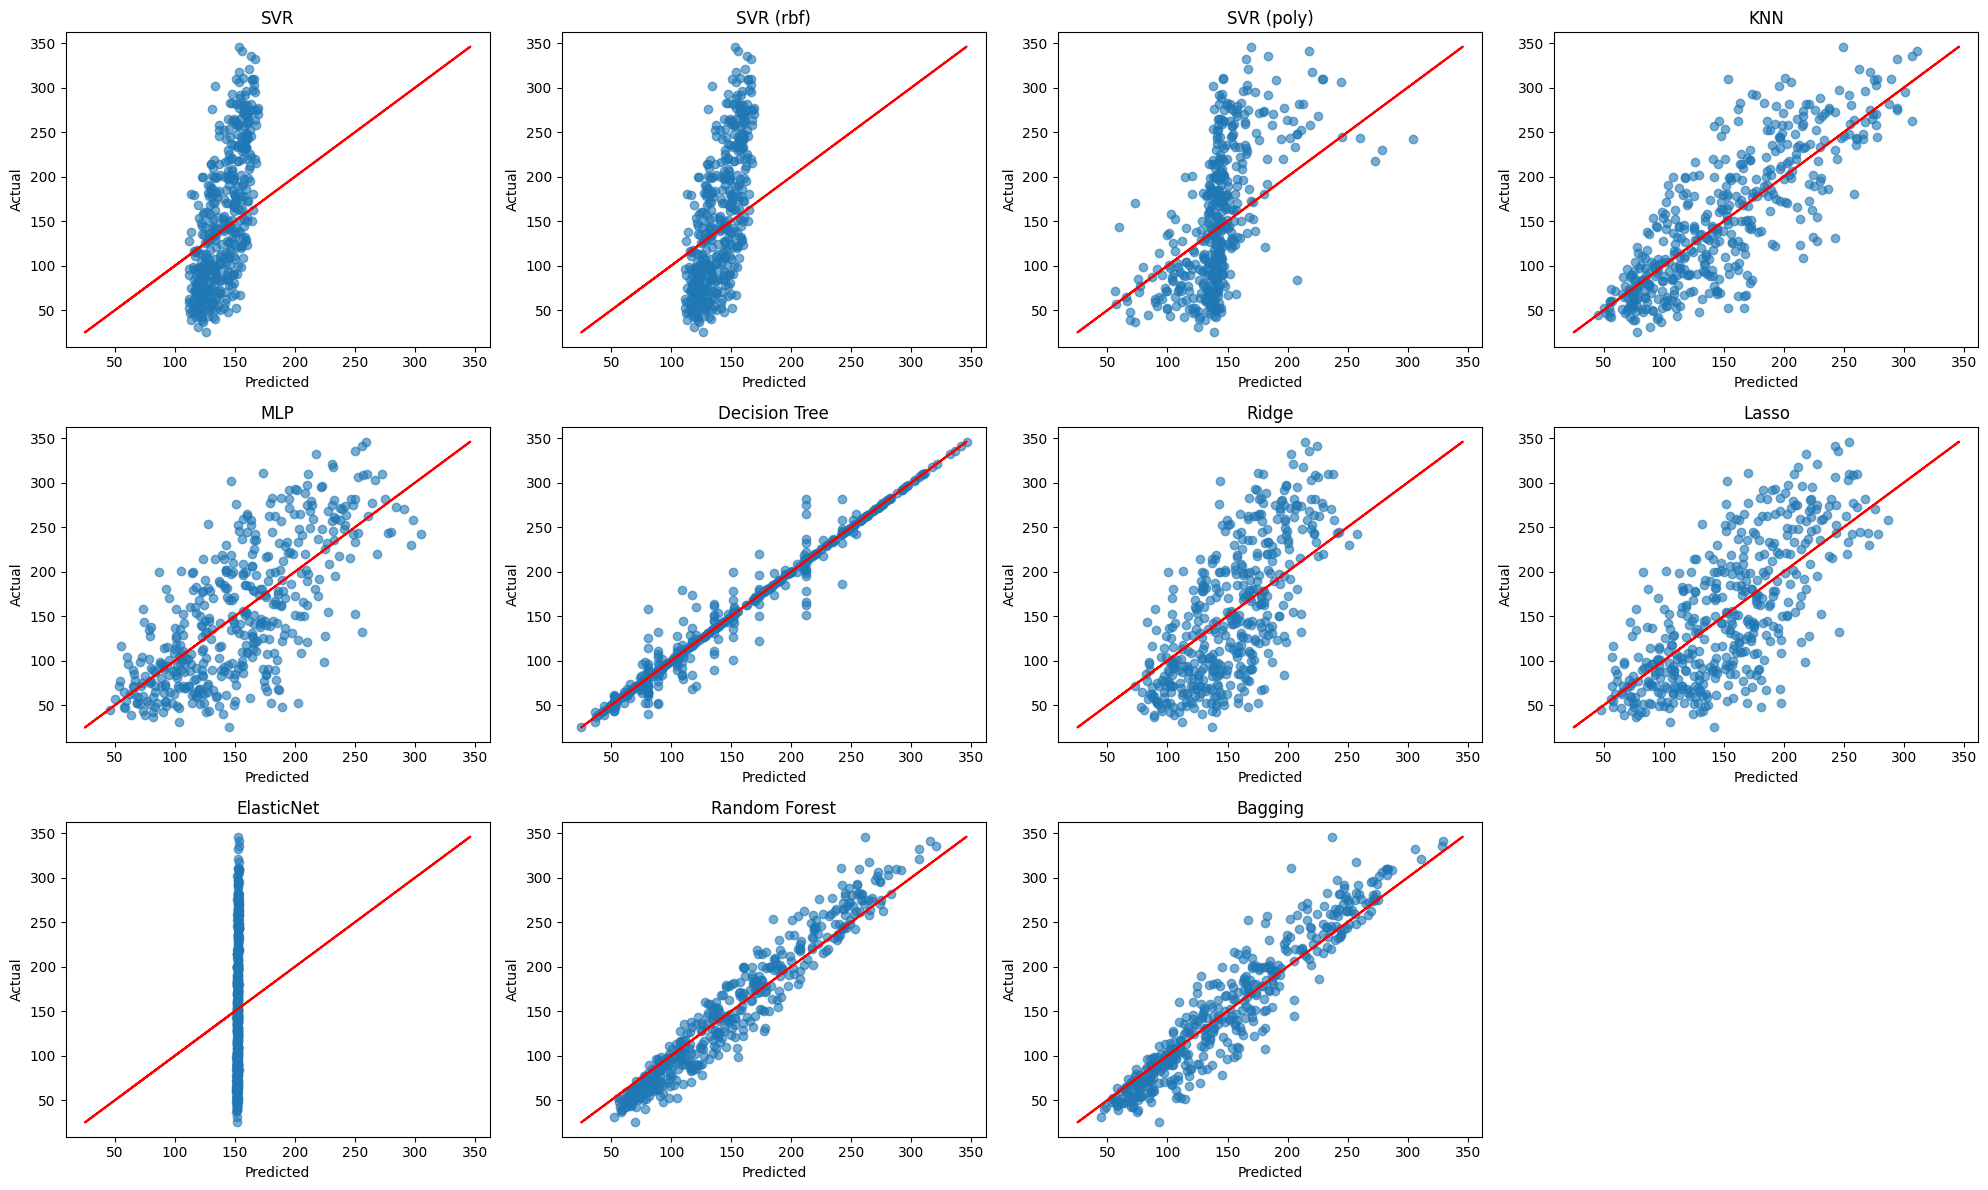

            Model        R2        MAE          MSE
0             SVR  0.207178  56.894793  4701.344763
1       SVR (rbf)  0.207178  56.894793  4701.344763
2      SVR (poly)  0.292594  53.086486  4194.833207
3             KNN  0.670435  33.849925  1954.281297
4             MLP  0.512841  43.425893  2888.794955
5   Decision Tree  0.964515   6.648614   210.424346
6           Ridge  0.451231  47.607358  3254.139212
7           Lasso  0.508839  44.058072  2912.527493
8      ElasticNet  0.008835  65.487754  5877.495852
9   Random Forest  0.918422  17.581900   483.745600
10        Bagging  0.885220  19.459276   680.634208


In [71]:
fit_all_models(X_diabets, y_diabets)